In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import warnings
from IPython.display import HTML
import cv2 as cv
import matplotlib.image as mpimg

from bokeh.io import output_notebook, show
from bokeh.models import ColumnDataSource,FactorRange,Legend
from bokeh.palettes import Category20
from bokeh.plotting import figure
from bokeh.transform import factor_cmap,dodge
from bokeh.palettes import Spectral4
import math
warnings.filterwarnings('ignore')

In [48]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)
CSS = """#notebook div.output_subarea {max-width:100%;}""" #changes output_subarea width to 100% (from 100% - 14ex)
HTML('<style>{}</style>'.format(CSS))

# ***Overview of COVID-19 in New York City***

### **Daily counts of cases, hospitalized and death**

In [33]:
df_case = pd.read_csv('coronavirus-data-master/case-death.csv')
output_notebook(hide_banner=True)
daterange = (df_case['DATE_OF_INTEREST'])
color = ['#1f77b4','#aec7e8','#ff7f0e']
source = ColumnDataSource(df_case)
p = figure(x_range = FactorRange(factors=daterange),title="Cases of Covid-19",
           plot_width=1400, plot_height = 600, y_range=(0, 6500), x_axis_label='Date',y_axis_label='Cases')
bar ={}
items = []
for (indx,i),col in zip(enumerate(df_case.iloc[:,1:]),Spectral4[1:]):
    bar[i] = p.vbar(x= 'DATE_OF_INTEREST', top=i, source= source, width = 0.9,muted_alpha=0.5, muted=True,color=col, fill_alpha = 0.6) 
    
    items.append((i, [bar[i]]))
legend = Legend(items= items , location=(0, -20),click_policy="hide",label_text_font_size="12pt" )
p.add_layout(legend, 'right')
#output_file("interactive_legend.html", title="interactive_legend.py example")

#p.xaxis[0].ticker.desired_num_ticks = 10
p.xaxis.major_label_orientation = math.pi/4
show(p)

### *From the visualization above, we can see a trend of ascending initially and then descending. However, the descending period is not reliable, since the official website of NYC has declared that data needs correction, sepecially recent data, which makes recent data trustless.*

### **Rates by Age**

In [39]:
df_age = pd.read_csv('coronavirus-data-master/by-age.csv')
output_notebook(hide_banner=True)
source = ColumnDataSource(df_age)
p = figure(x_range = FactorRange(factors = df_age['AGE_GROUP']),title="Rates by Age ",
           plot_width=950, plot_height = 500, y_range = (0, 4100), x_axis_label='Age Group', y_axis_label= 'Rate per 100,000 people')
bar ={}
items = []
for (indx,i),col in zip(enumerate(df_age.iloc[:,1:]),Spectral4[1:]):
    bar[i] = p.vbar(x= 'AGE_GROUP', top=i, source= source, width = 0.65,muted_alpha=0.5, muted=True,color=col, fill_alpha = 0.6) 
    
    items.append((i, [bar[i]]))
legend = Legend(items= items , location=(0, -20),click_policy="hide",label_text_font_size= '9pt')#"8pt"
p.add_layout(legend, 'right')
show(p)

### *This plot explicitly illustrates the risks people of different age group suffers. As we can see, old people over 65 years old are high risk groups, and the risk increases correspindingly with the increase of age. Teenagers and children under 17 years old are less susceptible to the infection of COVID-19.*

### **Rates by Sex**

In [44]:
df_sex = pd.read_csv('coronavirus-data-master/by-sex.csv')
output_notebook(hide_banner=True)
source = ColumnDataSource(df_sex)
p = figure(x_range = FactorRange(factors = df_sex['SEX_GROUP']),title="Rates by Sex ",
           plot_width=950, plot_height = 450, y_range = (0, 4100), x_axis_label='Sex', y_axis_label= 'Rate per 100,000 people')
bar ={}
items = []
for (indx,i),col in zip(enumerate(df_sex.iloc[:,1:]),Spectral4[1:]):
    bar[i] = p.vbar(x= 'SEX_GROUP', top=i, source= source, width = 0.4,muted_alpha=0.5, muted=True,color=col, fill_alpha = 0.6) 
    
    items.append((i, [bar[i]]))
legend = Legend(items= items , location=(0, -20),click_policy="hide",label_text_font_size= '8pt')#"8pt"
p.add_layout(legend, 'right')
show(p)

### *According to the plot, males' case rate, hospitalized rate and death rate are slightly higher than females'.*

### **Counts and Rates by Borough**

In [47]:
df_borough = pd.read_csv('coronavirus-data-master/boro.csv')
df_borough['COVID_CASE_RATE'] = df_borough['COVID_CASE_RATE']*10
df_borough = df_borough.iloc[:-1,:]
output_notebook(hide_banner=True)
color = ['#1f77b4','#aec7e8','#ff7f0e']
source = ColumnDataSource(df_borough)
p = figure(x_range = FactorRange(factors = df_borough['BOROUGH_GROUP']),title="Borough Statistics",
           plot_width=900, plot_height = 450, y_range = (0, 65000), x_axis_label='Borough', y_axis_label= 'Counts & Rates');
bar ={}
items = []
for (indx,i),col in zip(enumerate(df_borough.iloc[:,1:]),color[1:]):#[Spectral4[2], Spectral4[0]]
    bar[i] = p.vbar(x= 'BOROUGH_GROUP', top=i, source= source, width = 0.4,muted_alpha=0.6, muted=True,color=col, fill_alpha = 0.6) 
    
    items.append((i, [bar[i]]))
legend = Legend(items= items , location=(0, -20),click_policy="hide",label_text_font_size= '9pt')#"8pt"
p.add_layout(legend, 'right')
show(p)

### *The unit of 'COVID_CASE_RATE'  is  'rate per 1,000,000 people'. What's worth mentioning is that although Stanten Island have the least case amount, its case rate is quite high. Probably because it's a relatively small borough and the population density is high, which makes the virus spread easier.*

# ***Annual time feature of 311 service request***
### **The focused complaint are the most common types of 311 service request, and their annual time characteristics are shown in the interactive plot below. Start playing around with it and try to find some interesting and valuable information!**
#### **(Click the buttons above to select types, and click the legend label to show/hide the plot of a certain year)**
#### Please note that the time range of each type is from May 1st of one year to April 30th of the next year, which enable the plot of '2019-2020' cover the intergrated time range of the explosion of COVID-19.

### **We are here to provide some perspective of a good exploration**
#### *1. General annual trend of a certain type*
#### *2. Parallel comparision of different years of a certain type*
#### *3. Please pay special attention to 2019 — 2020, is there any abnormal trend comparing with that of the other years?*
#### 

In [3]:
HTML(filename="overview.html")

##### 
## **Did you manage to find anything interesting? Let's see if we have got the same valuable information!**


### **1. Let's start from 'Rodent'.**

In [5]:
HTML(filename="Rodent.html")

#### 1.1  According to the figure above, 311 service got the most complaint of rodent in summer. After September, it gradually decreases and then reach the bottom in December, after which it rises again. This is consistent with people's common sense that rodents are active in summer and inert in winter.
#### 1.2  Besides the general annual trend, there's also an abnormal descent began from early March 2020, which was exactly the time when the outbreak of COVID-19 began in NYC. What caused this descend? Probably people are paying more attention to sanitary conditions due to COVID-19, which limits the growth of rodents.
### **2. To verify that the sanitary conditions are better in the spring of 2020 than that of years before, let take a look at 'Dirty condition' as well**

In [7]:
HTML(filename="DIRTY CONDITION.html")

#### The case amount of 'dirty condition' begin from early March 2020 were also descending, which is pretty much like that of 'rodents', while the case counts of other years were gradually increasing from march. This consolidates our conjecture that the sanitary condition are better in 2020 than that of other years, which probably confines the breed of rodents.

### **3. Now let's focus on 'Noise' complaints, inclusing commercial, residential and street noises.**

In [9]:
HTML(filename="all_noises.html")

#### 3.1 About Street/Sidewalk Noises:  The complaint amount in winter is significantly less than that of summer, which makes sense because people are less likely to walk on the street in cold winter.
#### 3.2 About Commercial/Residential Noises:  There's no apparent annual trend such as increase of decrease. However, there are anomalies since early March, 2020. The complaint about residential noises increased significantly, while the complaint about commercial residential noises decreased, which reflects that people were inclined to stay at home rather than go to public commercial places after the breakout of COVID-19.

### **5. About tranportation: 'Blocked Driveway' complaints**

In [10]:
HTML(filename="Blocked Driveway.html")

#### 5.1 There's no apparent annual trend such as increase of decrease, which means that seasons don't have great influence on people's travel frequency and methods.
#### 5.2 Again, there's an anomaly in the complaint amount of 'blocked driveways' since early March, 2020, which reflects from another perspective that people were inclined to stay at home rather than go to public commercial places after the breakout of COVID-19.

### **6. What happened in NYC since July, 2019?**
#### **Let's first take a look at the type 'unsanitary condition'**

In [11]:
HTML(filename = 'UNSANITARY CONDITION.html')

#### **There's an apparent anomalous drop in July 2019, comparing with data of other years. What actually caused this drop?**

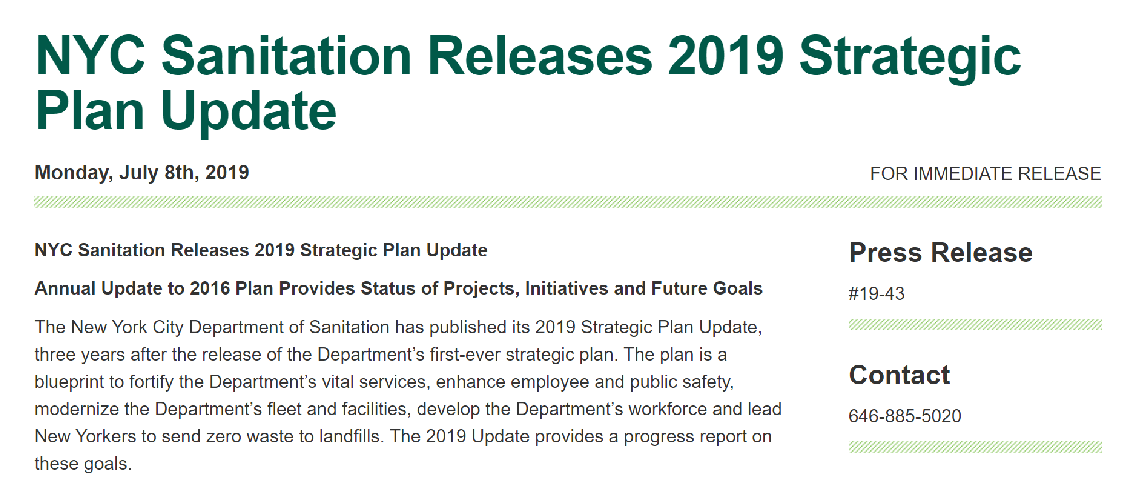

In [25]:
import matplotlib.image as mpimg
screenshot = mpimg.imread('NYC_sanitary_screenshot.png')
fig = plt.figure(figsize=(20, 30))  
plt.xticks([]) 
plt.yticks([])
plt.axis('off')
plt.imshow(screenshot);

##### Source: https://www1.nyc.gov/assets/dsny/site/resources/press-releases/nyc-sanitation-releases-2019-strategic-plan-update
#### **According to the official website of NYC, NYC Sanitation released 2019 Strategic Plan in July 2019, which includes different kind of measures to improve the hygiene of NYC. This can be a possible explanation to the steep drop of 'unsanitary condition' complaint amount. If it truly is the reason, then we must say that the efficiency of NYC Sanitation's actions is amazing and impressive.**